# 3.11.26 NumPy

### Motivation

Have you ever wondered how **the magic behind Photoshop or Instagram filters** happens? Let's import a picture into our Notebook:

In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

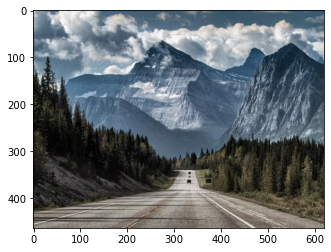

In [2]:
ph = io.imread("img/mountain.jpeg")
plt.imshow(ph)

If we inspect the object containing this picture, we can easily find out that **behind it there's nothing but numbers** or, more precisely, multi-dimensional arrays containing numbers. This is true for any digital image, video or audio file; let's see if we can understand how these numbers are related to the picture:  

In [ ]:
ph

First of all, using the `shape` attribute, we see that this image object has 3 dimensions:

In [ ]:
ph.shape

Try to picture this data as **three spreadsheets** of size 464 x 620 cells (that is, pixels) each, where each sheet contains values for one of the **three primary colours**: red, green and blue (RGB). These values usually go from 0 (black) to 255 (white). Each square in these "sheets" represents a colour tone and, by overlapping the three primary colours together, we obtain the final image. 

<img src="img/image-layers-3d.png" width="600">

This means that by adding, removing or modifying these arrays and numbers (the cells in the spreadsheet analogy), we can effectively change the apparence of the image. For instance, we can select a portion of this image by **slicing** it, that is, removing a portion of the underlying arrays and numbers. 

In [ ]:
plt.imshow(ph[0:300])

Le's see how this is done more in detail by introducing a very powerful mathematical library, numpy. 

---

### Introduction to NumPy

Numpy, which is short for "**num**erical **py**thon", is a **multi-dimensional array library**, which means that you can store data in one-dimensional 
arrays, two-dimensional arrays, three-dimensional arrays, four-dimensional arrays, etc; check out the image below for a visual explanation:

<img src="img/multidim-array.png" width="600">

While a scalar (that is, a single number) has no dimension, a vector (just like a list) has one dimension, which is given by the number of elements it contains: 

- a **scalar** has 0 dimensions, therefore it has no shape
- a **vector** has 1 dimension, therefore it has shape(n,)
- a **matrix** has 2 dimensions, therefore it has shape(n, m)
- ...
- an **ndarray** has n dimensions, therefore it has shape(n, m, ...)

In Python, you can load a library using the `import` keyword:

In [ ]:
# it is a common convention to import numpy "as np", as an abbreviation
import numpy as np

In [ ]:
# this is a numpy array:
a = np.array([4, 5, 6])
print(a)

In [ ]:
type(a)

In numpy, you can check the number of dimensions with the `.ndim` attribute as well as access the dimensional information of an array via the `.shape` attibute

In [ ]:
# to check the number of dimensions: 
a.ndim

In [ ]:
# to check its shape: 
a.shape

You may have noticed that both `ndim` and `shape` don't end with a pair of parenthesis like `len()` and `type()`; this is because they are not functions, instead they are **attributes** of the array object we created. 

--- 

#### Primer on classes & objects

Every time you create a new array with

```
a = np.array([4,5,6])
```

you are creating a new **object** of **class** `numpy.ndarray`. 

A **class is like a blueprint** you can use to create a series of objects, just like a car factory is a blueprint to create cars: in the end every car may be slightly different, depending on the optional selected, but they will all have some: 

- **attributes**: they are features of the object 
    - car examples: model, color, horsepower, ...
    - you can access an attribute with the following syntax: `object_name.attribute_name`
    - numpy example: `a.ndim`
- **methods**: they are actions that can be performed by the object 
    - car examples: accelerate, steer, break, ...
    - you can access a method with the following syntax: `object_name.method_name()`
    - numpy example: `a.tolist()`
    
<img src="img/class-object-car.png" width="300">

Similarly, a numpy array will have attributes that describe the object like `.ndim` or `.shape` and methods that allow it to do things like `.copy()` or `.tolist()`.

---

Depending on how we define an array, we can create an object with different dimensionalities: 

In [ ]:
# here we create several objects using the numpy array() function
scalar = np.array(4)
array1d = np.array([1,2,3])
array2d = np.array([[1,2,3], [4,5,6]])
array3d = np.array([[[1,2],[3,4]], [[5,6],[7,8]]])

In [ ]:
# let's check their number of dimensions and their shape
arrays = [scalar, array1d, array2d, array3d]
for arr in arrays: 
    print("dimensions:", arr.ndim, "| shape:", arr.shape)

So, why should we use numpy arrays instead of built-in Python data structures, such as lists? 

- numpy arrays are **very fast**, much faster than built-in Python lists
- numpy arrays are optimised for computing **linear algebra operations**, which are very common in several computer and data science domains 
- one of the most important data analysis libraries, **pandas**, is largely built on top of numpy, so it is advantageous to know its core foundations


#### Slicing

The practice of selecting a subsection of an array it's called **slicing** and it can be performed using the [ ] operator, similar to what we have been doing for lists. 

In [ ]:
vec = np.array([1,2,3,4,5,6,7])
print(vec)

Array slicing works just like with lists: 

In [ ]:
# get the first element
vec[0]

In [ ]:
# get the a subset of elements (remember: the last value is not included in the selection)
print(vec[3:6])

In [ ]:
# by specifying a step, you can skip, for example, every second value
print(vec[1:7:2])

If you have trouble visualising a **vector** (that is, a  1-dimensional array), think of it as a row or column of a spreadsheet. 

Similarly, a **matrix** (that is, a 2-dimensional array), can be thought of as a portion of a spreadsheet, such as two rows and three columns like in the example below (we are effectively stacking two vectors next to each other): 

In [ ]:
# let's create a matrix
mat = np.array([[1,2,3],[4,5,6]])
print(mat)

We can complicate things with a 3-dimensional array; to visualise this higher dimensionality, think of two spreadsheets one behind the other. In the example below we are binding (2) matrices, each with its rows (2) and columns (3), therefore the resulting array has 3 dimensions of shape (2,2,3). 

In [ ]:
tre = np.array([[[1, 2, 3],[4, 5, 6]],
                [[7, 8, 9],[10,11,12]]])
print(tre)
print("")
print("shape:", tre.shape)

In [ ]:
# to get the first block (2x3 matrix)
print(tre[0])

In [ ]:
# to get the second vector of the first block
print(tre[0,1])

In [ ]:
# to get the third element of the second vector of the first block
tre[0,1,2]

In [ ]:
# to get the second vector of both (first and second) blocks
print(tre[:,1,:])

#### Replace

If we want to replace an element of a vector, again we implement the same operation we used with lists: 

In [ ]:
vec

In [ ]:
# to replace 2, 3, and 4 with 9s
vec[1:4] = [9,9,9]
vec

In [ ]:
tre

In [ ]:
# to replace the second vector of both blocks with two vectors of 0s and 1s
tre[:,1,:] = [[0,0,0,], [1,1,1,]]
tre

#### Zeros and Ones

Numpy allows the creation of vectors containing only **zeros** or **ones** in the following way: 

In [ ]:
# All zeros
np.zeros(4)

In [ ]:
# note: you can always specify the data type, such as int32, int64, float32, ..
np.zeros((2,3), dtype='int32')

In [ ]:
# All ones
np.ones((2,3,4))

In [ ]:
# Any other number
np.full((2,4), 10)

#### Random values

You can also generate random values using numpy's built in functions

In [ ]:
# generate a random vector of decimal numbers between 0 and 1
np.random.rand(3)

In [ ]:
np.random.rand(2, 3)

In [ ]:
# generate a random integer between two numbers
np.random.randint(1, 100)

In [ ]:
# to specify a shape
np.random.randint(1, 100, size = (2, 3))

#### Mathematics

Numpy comes packed with many useful matemathical capabilities and formulas

In [ ]:
x = np.array([1,2,3,4,5])
print(x)

In [ ]:
# you can add, subtract, multiply, etc... a scalar element-wise
print(x + 2)
print(x * 10)
print(x ** 2)

In [ ]:
y = np.array([1,2,2,4,4])
print(y)

In [ ]:
# you can perform element-wise operations between vectors
z = x - y
print(z)

In [ ]:
# take the sine of each element in the vector
np.sin(z)

In [ ]:
# take the cosine of each element in the vector
np.cos(z)

#### Linear Algebra 

You can also do any kind of **linear algebra** calculations. 

*Note that this topic is a bit more advanced and, unless you wish to explore the wonderful world of machine learning, you will rarely encounter linear algebra in your path. Nevertheless, if you're interested in the topic, I can recommend [this video](https://www.youtube.com/watch?v=JSjWltL9-7M) for a gentle introduction or, alternatively, check out [this lecture](https://pabloinsente.github.io/intro-linear-algebra#matrix-matrix-multiplication) (there are also many free courses on Coursera and similar platfomrs!).*

In [ ]:
print(x)
print(z)
np.matmul(x,z)

In [ ]:
mat1 = np.array([[1,2,3], [4,5,6]])
mat2 = np.array([[0,1],[0,1],[0,1]])
print(mat1)
print("")
print(mat2)

The following three ways to multiply matrices are equivalent:

In [ ]:
np.matmul(mat1,mat2)

In [ ]:
np.dot(mat1,mat2)

In [ ]:
mat1 @ mat2

Remember that, unlike with scalars, **matrix multiplication is not commutative**, therefore, `(mat1 x mat2) != (mat2 x mat1)`

In [ ]:
np.matmul(mat2,mat1)

#### Statistics

You can also quickly and easily compute basic statistics about an array or matrix

In [ ]:
mat1

In [ ]:
print("min:", np.min(mat1))
print("mean:", np.mean(mat1))
print("median:", np.median(mat1))
print("sum:", np.sum(mat1))
print("max:", np.max(mat1))

In [ ]:
# marginal minimum for each column
np.min(mat1, axis = 0)

In [ ]:
# marginal minimum for each row
np.min(mat1, axis = 1)

In [ ]:
np.mean(mat1)

In [ ]:
np.mean(mat1, axis = 0)

#### Array Manipulation

You can reshape and reorganise an array in several ways

In [ ]:
# reshaping 
ante = np.array([[1,2,3,4],[5,6,7,8]])
print("ante:")
print(ante)
print("shape:", ante.shape)
print("")
post = ante.reshape((8,1))
print("post:")
print(post)
print("shape:", post.shape)

In [ ]:
# vertical stacking 
arr1 = np.array([1,2,3,4])
arr2 = np.array([5,6,7,8])

np.vstack([arr1,arr2])

In [ ]:
# horizontal  stack
np.hstack((arr1,arr2))

In [ ]:
# combining the two above
np.hstack((arr1.reshape(4,1),arr2.reshape(4,1)))

#### Advanced Indexing

You can apply boolean logic to a vector and keep only the elements that result True

In [ ]:
vec

In [ ]:
# boolean logic is checked against the vector
vec > 5

In [ ]:
# to retain only the elements that are True, you can index the vector by the True/False result of the boolean statement
vec[vec > 5]

In [ ]:
mat = np.array([[32, 45, 120], [54, 23, 230]])
mat

In [ ]:
# you can also check if any of the rows/columns (depending on the axis chosen) of a matrix meet a certain condition
print("is any element by column > 50?", np.any(mat > 50, axis = 0) )
print("is any element by row > 50?   ", np.any(mat > 50, axis = 1) )

In [ ]:
# or if all of the rows/columns meet that condition
print("are all elements by column > 50?", np.all(mat > 50, axis = 0) )
print("are all elements by row > 50?   ", np.all(mat > 50, axis = 1) )

---

### Cheatsheet

Go to [this link](http://datacamp-community-prod.s3.amazonaws.com/ba1fe95a-8b70-4d2f-95b0-bc954e9071b0) for a numpy cheatsheet *(source:DataCamp)*.

---

### Image processing: a practical example

Let's go back to our initial photo editing example; the picture below was taken in 1826 by French scientist Joseph Nicéphore, whom exposed a bitumen-coated plate in a camera obscura for several hours. It is believed to be the first photograph ever captured, so you may appreciate the irony in applying some digital editing to it. 

In [ ]:
bw = io.imread("img/first-photo.jpeg")
plt.imshow(bw)

Let's check the data type, dimensionality and shape of the `bw` object

In [ ]:
print(type(bw))
print("dimensions:", bw.ndim)
print("shape:", bw.shape)

Let's check what the underlying data looks like

In [ ]:
bw

Let's plot again the picture: 

In [ ]:
plt.imshow(bw)

Let's say we wanted to **crop the picture** to keep just the chimney on the right, we would need to select (from each one of the three sheets), all the rows and just the "columns" from 200 onwards

In [ ]:
bw_crop = bw[:,200:,:]
plt.imshow(bw_crop)

If we wanted to brighten the image, we could apply a **boolean mask**, where we replace all the pixels that are greater than 200 (light grey) with a 255 (white)

In [ ]:
bw_mask = bw.copy()
bw_mask[bw_mask > 200] = 255

In [ ]:
plt.imshow(bw_mask)

We could also completely **desecrate this artwork** by "drawing" something on it; specifically, we're going to replace, in each "sheet of paper" (that is, in each of the three colour-dimensions), a square of 25x25 pixels in the middle of the image:

- in the **red** dimension we write 232
- in the **green** dimension we write 13
- in the **blue** dimension we write 157

These three RGB values produce the fucsia colour that you can see in the picture below:

In [ ]:
bw_draw = bw.copy()
bw_draw[25:50, 125:150, :] = [232, 13, 157]

In [ ]:
plt.imshow(bw_draw)

---

### Homework

#### Standard Exercises

Before you begin, remember to import the numpy library, if necessary.

In [ ]:
import numpy as np

1. Create the following two arrays and print them to screen: 

- a vector `vec1`, containing all the even numbers from 2 to 10, (extremes included)
- a vector `vec2`, containing all the numbers from 1 to 5, (extremes included)

2. Subrtact `vec2` from `vec1` and save the result in a new vector `vec3`, then print `vec3`

3. Create a new vector `vec4` that is sums the scalar 5 to each element of `vec3`, then print `vec4`

4. Using vertical stacking, stack `vec3` on top of `vec4` and save the result to a new object named `matrix25`, then print `matrix25`

5. Using slicing, print to the screen the following subsets of `matrix25`: 

- print only the second row of data
- print only the third column of data
- print only the last element of the second row of data

6. Create an array of size 5x5 (a matrix), containing random integer values from 1 to 100; name it `matrix55` and print it

7. Using three separate statements, print:

- the average of the whole table 
- the sum for each row of the matrix *(hint: you should get 5 results)*
- the maximum value for each column of the matrix *(hint: you should get 5 results)*

*Note: make sure you select the correct axis! [Click here](https://www.sharpsightlabs.com/blog/numpy-axes-explained/) for a refresher.*

8. Use a boolean mask to select only the values in the matrix that are above 50 and save the result in a new object named `mm`, then print `mm`. 

9. What is the shape of `mm`? If possible, reshape it to a multi-dimensional array (that is, an object with more than one dimension) and save it to a new object named `mmr`, then print `mmr`. *Note: since we generated `matrix55` using random numbers, your final result may be different from mine and from everyone esle.*

10. Print just the elements of the `mmr` matrix that are even.

**If you would like to <font color='green'>continue practicing</font>, visit [this link](https://www.machinelearningplus.com/python/101-numpy-exercises-python/) for a list of 70 numpy exercises with solutions.**

#### Advanced Exercises

1. Replicate the following scheme using the functions and methods we saw in class (not by entering each value by hand)

```
[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 1 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]
```

Before moving to the next question, import the following libraries

In [ ]:
from skimage import io
import matplotlib.pyplot as plt

2. Using the `io.imread()` function, load the `hw_earth.jpeg` (from the img folder) image file to a new object named `earth` and show it with the `plt.imshow()` function. 

3. Using the methods seen in class, crop the image as to roughly show only Europe and assign it to a new object named `europe`

4. Using a boolean mask, take the `earth` object and replace all pixels with a value > 200 with a value of 255 (255 = white), this process should slightly increase the contrast of the image; assign this image to a new object named `earth_white`.

5. [<font color='red'>**Difficult**</font>] Take the initial `earth` picture and add the `hw_alien.png` (from the img folder) somewhere in the black void to the left of the earth (you should get something like the screenshot below).

<img src="hw_earth-alien-screenshot.png" width="300">